## 3. ML for Classification
* We'll use logistic regression to predict churn

### 3.1 Churn Prediction Project
* Dataset: [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

### 3.2 Data Preparation
* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable need any preparation

In [105]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [107]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [108]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [109]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [110]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [111]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [112]:
df.totalcharges = df.totalcharges.fillna(0)

In [113]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [114]:
df.churn = (df.churn == 'yes').astype(int)

In [115]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

### 3.3 Setting up the validation framework
* Perform the train/validation/test split with Scikit-Learn

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [118]:
len(df_full_train), len(df_test)

(5634, 1409)

In [119]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [120]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [121]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [122]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [123]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

### 3.4 EDA
* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [124]:
df_full_train = df_full_train.reset_index(drop=True)

In [125]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [126]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [127]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [128]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [129]:
categorical =['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [130]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature Importance: Churn rate and risk ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable
* Churn rate
* Risk ratio
* Mutual information - later

#### Churn rate

In [131]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [132]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [133]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [134]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [135]:
global_churn - churn_male

0.006754520462819769

In [136]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [137]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [138]:
global_churn - churn_partner

0.06493474245795922

In [139]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

FEATURE IMPORTANCE
* Difference
    * Global - Group > 0: LESS LIKELY to Churn
    * Global - Group < 0: MORE LIKELY to Churn
* Risk Ratio
    * RISK = Group/Global > 1: MORE LIKELY to Churn
    * RISK = Group/Global < 1: LESS LIKELY to Churn  

#### Risk ratio

In [140]:
churn_no_partner / global_churn

1.2216593879412643

In [141]:
churn_partner / global_churn

0.7594724924338315

returning the avg. churn, avg. diff, avg. risk, gender as group

In [142]:
from IPython.display import display

In [143]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Mutual information
Mutua information - concept from information theory, it tells us how much we can learn about one varaiable if we know the value of another.
* Reference: [Wikipedia](https://en.wikipedia.org/wiki/Mutual_information)

In [144]:
from sklearn.metrics import mutual_info_score

In [145]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [146]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [147]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [148]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [149]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [150]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation
How about numerical columns?
* Correlation coefficient: [Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

* 0.0 - +/-0.2: LOW (Rarely)
* +/-0.2 - +/-0.5: MODERATE (Sometimes)
* +/- 0.6 - +/- 1.0: STRONG (Often/Always) 

In [151]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

#### tenure: negative correlation

In [152]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [153]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [154]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

#### monthly charges: positive correlation

In [155]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [156]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [157]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

## 3.8 One-Hot encoding
* Use scikit-Learn to encode categorical featrues

In [158]:
from sklearn.feature_extraction import DictVectorizer

In [159]:
train_dicts = df_train[categorical+numerical].to_dict(orient='records')

In [160]:
dv = DictVectorizer(sparse=False)

In [161]:
X_train = dv.fit_transform(train_dicts) #fit then transform it

In [162]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')

In [163]:
X_val = dv.transform(val_dicts)

## 3.9 Logistic Regression
* Binary Classification
* Linear Vs Logistic Regression

$$ g(X_i) = \sigma(W_0 + W^T.X_i) $$
$$ g(X_i) \in [0, 1] $$
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$


In [164]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [165]:
z = np.linspace(-10, 10, 51)

In [166]:
sigmoid(z)

array([4.53978687e-05, 6.77241496e-05, 1.01029194e-04, 1.50710358e-04,
       2.24816770e-04, 3.35350130e-04, 5.00201107e-04, 7.46028834e-04,
       1.11253603e-03, 1.65880108e-03, 2.47262316e-03, 3.68423990e-03,
       5.48629890e-03, 8.16257115e-03, 1.21284350e-02, 1.79862100e-02,
       2.65969936e-02, 3.91657228e-02, 5.73241759e-02, 8.31726965e-02,
       1.19202922e-01, 1.67981615e-01, 2.31475217e-01, 3.10025519e-01,
       4.01312340e-01, 5.00000000e-01, 5.98687660e-01, 6.89974481e-01,
       7.68524783e-01, 8.32018385e-01, 8.80797078e-01, 9.16827304e-01,
       9.42675824e-01, 9.60834277e-01, 9.73403006e-01, 9.82013790e-01,
       9.87871565e-01, 9.91837429e-01, 9.94513701e-01, 9.96315760e-01,
       9.97527377e-01, 9.98341199e-01, 9.98887464e-01, 9.99253971e-01,
       9.99499799e-01, 9.99664650e-01, 9.99775183e-01, 9.99849290e-01,
       9.99898971e-01, 9.99932276e-01, 9.99954602e-01])

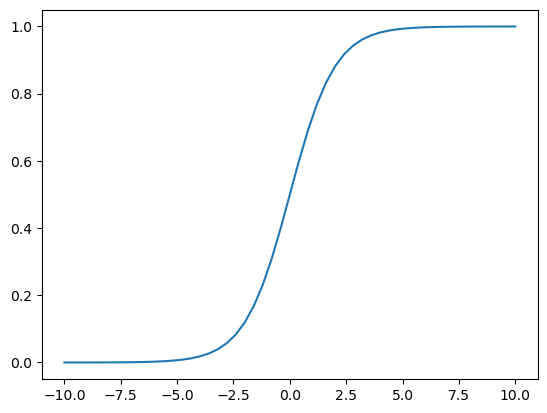

In [167]:
plt.plot(z, sigmoid(z));

In [168]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [169]:
def logistic_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn
* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

* For linear models, the <b> intercept </b> is the value of the linear predictor when all covariates are zero.
* In linear regression, this is equivalent to the y-intercept of the line of best fit.
* In logistic regression, it is the log odds of the baseline group.

In [172]:
model.intercept_[0]

-0.10903802815833008

In [173]:
model.coef_.round(3)

array([[ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
        -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
         0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
         0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
        -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
         0.213, -0.089, -0.232, -0.07 ,  0.   ]])

In [174]:
y_pred = model.predict_proba(X_val)[:, 1]

In [175]:
churn_decision = (y_pred >= 0.5)

In [176]:
(y_val == churn_decision).mean()

0.8034066713981547

In [177]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [178]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [179]:
df_pred.correct.mean()

0.8034066713981547

In [180]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [181]:
# model is 80% correct

## 3.11 Model intepretation
* Look at the coefficients
* Train a smaller model with fewer features

In [182]:
# zip interpretation
a = [1, 2, 3, 4]
b = 'abcd'
print(f'As List: {list(zip(a,b))},\nAs Dictionary: {dict(zip(a, b))}')

As List: [(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')],
As Dictionary: {1: 'a', 2: 'b', 3: 'c', 4: 'd'}


*  Coef: Determine the relationship between input and output variables in a model. These numerical values are learned during training and used to make predictions on new data

In [183]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [184]:
small = ['contract', 'tenure', 'monthlycharges']

In [185]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [186]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [187]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [188]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [189]:
X_train_small = dv_small.transform(dicts_train_small)

In [190]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [191]:
w0 = model_small.intercept_[0]
w0

-2.476775657530109

In [192]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [193]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [194]:
# if user with month-to-month contract, 50 monthly charges, using for 5 month tenure.
# Then -2.7 + 1*0.97 + (0*-0.025) + (0*-0.949) + 0.027*50 + (-0.036*5)

In [195]:
sigmoid(-2.47 + 0.97*1 + 0.027*50 + 5*(-0.036))

0.41824062315816374

## 3.12 Using the Model

In [196]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [197]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [198]:
y_full_train = df_full_train.churn.values

In [199]:
model = LogisticRegression().fit(X_full_train, y_full_train)

In [200]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [201]:
X_test = dv.transform(dicts_test)

In [202]:
y_pred = model.predict_proba(X_test)[:, 1]

In [203]:
churn_decision = (y_pred >= 0.5)

In [204]:
(churn_decision == y_test).mean()

0.815471965933286

In [205]:
# testing
customer_01 = dicts_test[10]
customer_02 = dicts_test[-1]

In [206]:
X_01 = dv.transform(customer_01)
X_02 = dv.transform(customer_02)

In [207]:
print(f'customer_01: prediction {model.predict_proba(X_01)[0, 1]} \ncustomer_02: prediction {model.predict_proba(X_02)[0, 1]} ')

customer_01: prediction 0.40568109779496697 
customer_02: prediction 0.5968852088363557 


In [208]:
# testing
print(f'customer 01: {y_test[10]} \ncustomer 02: {y_test[-1]}')

customer 01: 0 
customer 02: 1


## 3.13 Summary
* Feature importance - risk, mutual information, correlation
* one-hot encoding can be implemented with DictVectorizer
* Logistic Regression - linear model like linear regression
* output of log reg - probability
* Interpretation of weights is similar to linear regression

## 3.14 Explore with topics
* continues in explore.ipynb notebook